In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, RepeatVector, TimeDistributed, Dense
from keras.callbacks import EarlyStopping
import plotly.graph_objects as go
from tensorflow.keras.optimizers import Adam


df = pd.read_csv('/content/cpu_utilization_asg_misconfiguration (1).csv')
df = df[['time', 'value']]
df['time'] = pd.to_datetime(df['time'])

fig = go.Figure()
fig.add_trace(go.Scatter(x=df['time'], y=df['value'], name='cpu usage'))
fig.update_layout(showlegend=True, title='cpu usage')
fig.show()

train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(train.shape, test.shape)

# Scaling the data
scaler = StandardScaler()
train['value'] = scaler.fit_transform(train[['value']])
test['value'] = scaler.transform(test[['value']])

# Function to create dataset for LSTM
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 10
# reshape to [samples, time_steps, n_features]
X_train, y_train = create_dataset(train[['value']], train.value, TIME_STEPS)
X_test, y_test = create_dataset(test[['value']], test.value, TIME_STEPS)

# LSTM Autoencoder model
model = Sequential()
model.add(LSTM(units=128, input_shape=(TIME_STEPS, 1)))
model.add(Dropout(rate=0.2))
model.add(RepeatVector(n=TIME_STEPS))
model.add(LSTM(units=128,  return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(units=1)))
model.compile(optimizer=Adam(learning_rate=0.01), loss="mse")
model.summary()



(16245, 2) (1805, 2)


<ipython-input-46-b189d90a51d3>:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-46-b189d90a51d3>:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 128)               66560     
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 repeat_vector_7 (RepeatVec  (None, 10, 128)           0         
 tor)                                                            
                                                                 
 lstm_15 (LSTM)              (None, 10, 128)           131584    
                                                                 
 dropout_15 (Dropout)        (None, 10, 128)           0         
                                                                 
 time_distributed_7 (TimeDi  (None, 10, 1)             129       
 stributed)                                           

In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1805 entries, 16245 to 18049
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    1805 non-null   datetime64[ns]
 1   value   1805 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 28.3 KB


In [48]:
df.time

0       2014-05-14 01:14:00
1       2014-05-14 01:19:00
2       2014-05-14 01:24:00
3       2014-05-14 01:29:00
4       2014-05-14 01:34:00
                ...        
18045   2014-07-15 16:59:00
18046   2014-07-15 17:04:00
18047   2014-07-15 17:09:00
18048   2014-07-15 17:14:00
18049   2014-07-15 17:19:00
Name: time, Length: 18050, dtype: datetime64[ns]

Epoch 1/50
457/457 [==============================] - 9s 11ms/step - loss: 0.4118 - val_loss: 0.3348
Epoch 2/50
 12/457 [..............................] - ETA: 4s - loss: 0.1820

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



457/457 [==============================] - 3s 7ms/step - loss: 0.1282 - val_loss: 0.0383
Epoch 3/50
457/457 [==============================] - 3s 6ms/step - loss: 0.0777 - val_loss: 0.9071
Epoch 4/50
457/457 [==============================] - 3s 6ms/step - loss: 0.0845 - val_loss: 0.0334
Epoch 5/50
457/457 [==============================] - 3s 7ms/step - loss: 0.0630 - val_loss: 0.0317
Epoch 6/50
457/457 [==============================] - 3s 7ms/step - loss: 0.0609 - val_loss: 0.0238
Epoch 7/50
457/457 [==============================] - 3s 7ms/step - loss: 0.0550 - val_loss: 0.0235
Epoch 8/50
457/457 [==============================] - 4s 8ms/step - loss: 0.0556 - val_loss: 0.0207
Epoch 9/50
457/457 [==============================] - 3s 7ms/step - loss: 0.0655 - val_loss: 0.0272
Epoch 10/50
457/457 [==============================] - 3s 7ms/step - loss: 0.0540 - val_loss: 0.0187
Epoch 11/50
457/457 [==============================] - 3s 6ms/step - loss: 0.0476 - val_loss: 0.0246
Epoch 12/

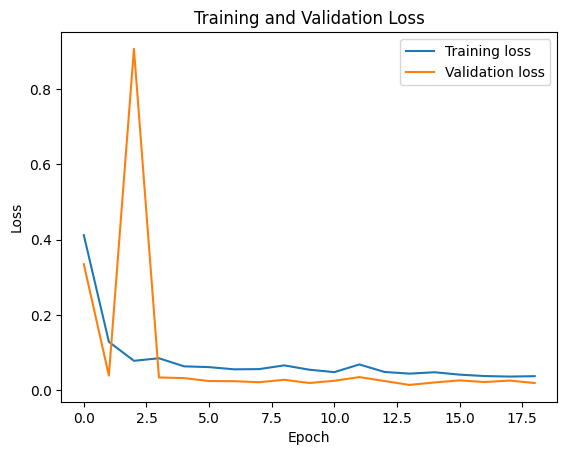

In [49]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, mode='min'),
    ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True, mode='min')
]

# Training the model
history = model.fit(
    X_train, X_train,  # Autoencoder: input and output are the same
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    callbacks=callbacks,
    shuffle=False
)

# Plotting training and validation losses
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [62]:
# Calculate MAE loss for train set to set threshold
X_train_pred = model.predict(X_train)
train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

# Set reconstruction error threshold
#THRESHOLD = np.max(train_mae_loss)
THRESHOLD=1.6
print('Reconstruction error threshold:', THRESHOLD)

# Predict on test set and calculate MAE loss
X_test_pred = model.predict(X_test)
test_mae_loss = np.mean(np.abs(X_test_pred - X_test), axis=1)

508/508 [==============================] - 2s 5ms/step
Reconstruction error threshold: 1.6
57/57 [==============================] - 0s 2ms/step


In [63]:
# Create DataFrame to store results with time index
test_score_df = pd.DataFrame(index=test.index[TIME_STEPS:])
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = THRESHOLD
test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold
test_score_df['value'] = test[TIME_STEPS:].value
test_score_df['time']=df[TIME_STEPS:].time

# Visualize test loss vs threshold with time
fig = go.Figure()
fig.add_trace(go.Scatter(x=test_score_df.time, y=test_score_df.loss, name='Test loss'))
fig.add_trace(go.Scatter(x=test_score_df.time, y=test_score_df.threshold, name='Threshold'))
fig.update_layout(showlegend=True, title='Test loss vs. Threshold')
fig.show()

# Identify anomalies
anomalies = test_score_df[test_score_df.anomaly]




In [64]:
anomalies

,loss,threshold,anomaly,value,time
17005,1.609008,1.6,True,1.453540,2014-07-12 02:19:00
17641,1.637918,1.6,True,1.379316,2014-07-14 07:19:00
17677,1.601102,1.6,True,0.921644,2014-07-14 10:19:00


In [65]:
# Visualize detected anomalies with time
fig = go.Figure()
fig.add_trace(go.Scatter(x=test.time[TIME_STEPS:], y=test[TIME_STEPS:].value, mode='lines', name='cpu usage'))
fig.add_trace(go.Scatter(x=anomalies.time, y=anomalies.value, mode='markers', name='Anomaly'))
fig.update_layout(showlegend=True, title='Detected anomalies')
fig.show()
